# Classification and Prediction of Diabetes in Pima Women

This exercise involves determining whether Pima Native American women living near Phoenix, Arizona have diabetes by learning from a dataset. 

The [dataset](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) contains the following fields:
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1)

This notebook is adapted from http://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# What's in the Dataset?

It's helpful to get a good look at the features in the dataset to see if normalization and/or scaling will help.

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History 

import matplotlib.pyplot as plt
import numpy, math


# fix random seed for reproducibility
seed = 43
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]   # 1 = tested positive for diabetes

# examine each feature's standard deviation to see if we need to normalize the data
print("-----Raw dataset feature standard deviations-----")
for i in range(0, X.shape[1]):
    column_elements = list(zip(*X))[i]
    print("feature %i: %f" % (i+1, numpy.std(column_elements)))

-----Raw dataset feature standard deviations-----
feature 1: 3.367384
feature 2: 31.951796
feature 3: 19.343202
feature 4: 15.941829
feature 5: 115.168949
feature 6: 7.879026
feature 7: 0.331113
feature 8: 11.752573


# Feature Normalization and Scaling

I actually noticed this potential problem after examining the learning curves plotted at the end of this notebook. There was an interesting feature in the accuracy plot where the accuracy didn't start improving until around the 50th epoch. I got to wondering why it took so long to start learning and remembered I didn't check the dataset features for a sane range of standard deviations before training. It is an interesting exercise to see the accuracy and loss plots over epochs change if you remove the following feature scaling code.

Our target standard deviation should be near 1 and we would ideally have a zero mean to improve the error surface to promote good learning rates. Our raw data is showing a wide range of values across features, making the learning process more difficult than necessary and perhaps impacting model accuracy/loss.

Let's fix that:

In [9]:
from sklearn import preprocessing

X = preprocessing.scale(X);

print("-----Scaled dataset feature standard deviations-----")
for i in range(0, X.shape[1]):
    column_elements = list(zip(*X))[i]
    print("feature %i: %f" % (i+1, numpy.std(column_elements)))      #standard deviation after scaling

-----Scaled dataset feature standard deviations-----
feature 1: 1.000000
feature 2: 1.000000
feature 3: 1.000000
feature 4: 1.000000
feature 5: 1.000000
feature 6: 1.000000
feature 7: 1.000000
feature 8: 1.000000


# Training and Test Datasets

We'll dedicate 30% of our dataset examples to testing.

In [3]:
# split datasets into training and test sets
num_examples = X.shape[0]
validation_split_percentage = 0.3    # 30% of examples set aside as validation set 
split_index = math.floor(num_examples * (1-validation_split_percentage)) # 70% of dataset will go toward training

X_train = X[:split_index-1]
Y_train = Y[:split_index-1]

X_test = X[split_index-1:]
Y_test = Y[split_index-1:]

# Defining and Running the Neural Network

This neural network consists of three fully-connected layers. Our eight input features per example will feed into the first layer and there's one output layer for this classification task.

In [4]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model, retain history for later analysis
history = History()
history = model.fit(X, Y, nb_epoch=150, batch_size=10, validation_split=validation_split_percentage, callbacks=[history], verbose=0)

# evaluate the model
scores = model.evaluate(X_train, Y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

416/536 [======================>.......] - ETA: 0s224/536 [===========>..................] - ETA: 0s
acc: 78.92%
loss: 43.43%


# Test Loss after Training

Now that we've trained the model above, it's time to see how the model performs on data it hasn't trained on:

In [5]:
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/232 [===>..........................] - ETA: 0s232/232 [==============================] - 0s     

acc: 80.60%


We see that the training and test accuracies are both relatively high and roughly equal. This indicates that the model exhibits low variance and low bias and will likely produce a lower error given more training data.

# Plotting the Results

We got a good look at the overall results of the classifier above. Let's visualize the training and test history to see how the net learned over epochs.

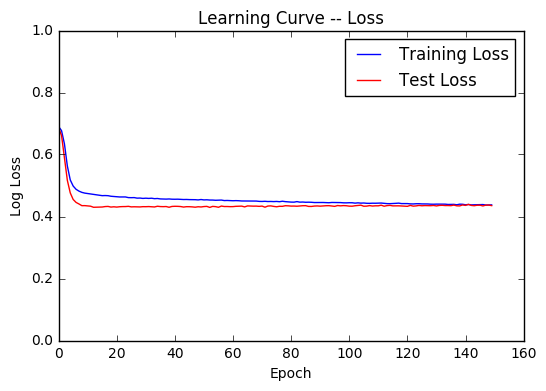

In [6]:
plt.figure()
plt.title("Learning Curve -- Loss")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.ylim((0.0, 1.0))
 
# Plot the loss for training and testing sets
train_loss_data = history.history['loss']
test_loss_data = history.history['val_loss']
plt.plot(train_loss_data, color="b", label='Training Loss')
plt.plot(test_loss_data, color="r", label='Test Loss')

# Draw the plot and reset the y-axis
plt.legend(loc="best")
plt.draw()
plt.show()

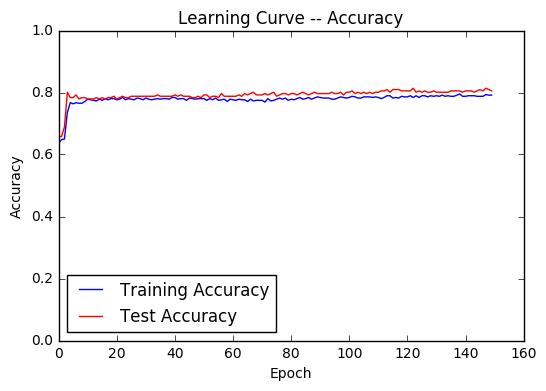

In [7]:
plt.figure()
plt.title("Learning Curve -- Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim((0.0, 1.0))
 
# Plot the loss for training and testing sets
train_acc_data = history.history['acc']
test_acc_data = history.history['val_acc']
plt.plot(train_acc_data, color="b", label='Training Accuracy')
plt.plot(test_acc_data, color="r", label='Test Accuracy')

# Draw the plot and reset the y-axis
plt.legend(loc="best")
plt.draw()
plt.show()

# Summary

This exercise walked through loading and viewing a raw dataset, performing feature scaling and normalization to improve learning, the definition and training of a neural network and an evaluation of its performance.

With an accuracy of around 80%, this neural network seems to be a helpful tool in screening for diabetes in this particular population. Perhaps a different network model or more input features would produce a higher accuracy that could rival a physician's expert diagnosis to help in areas underserved by access to physicians.